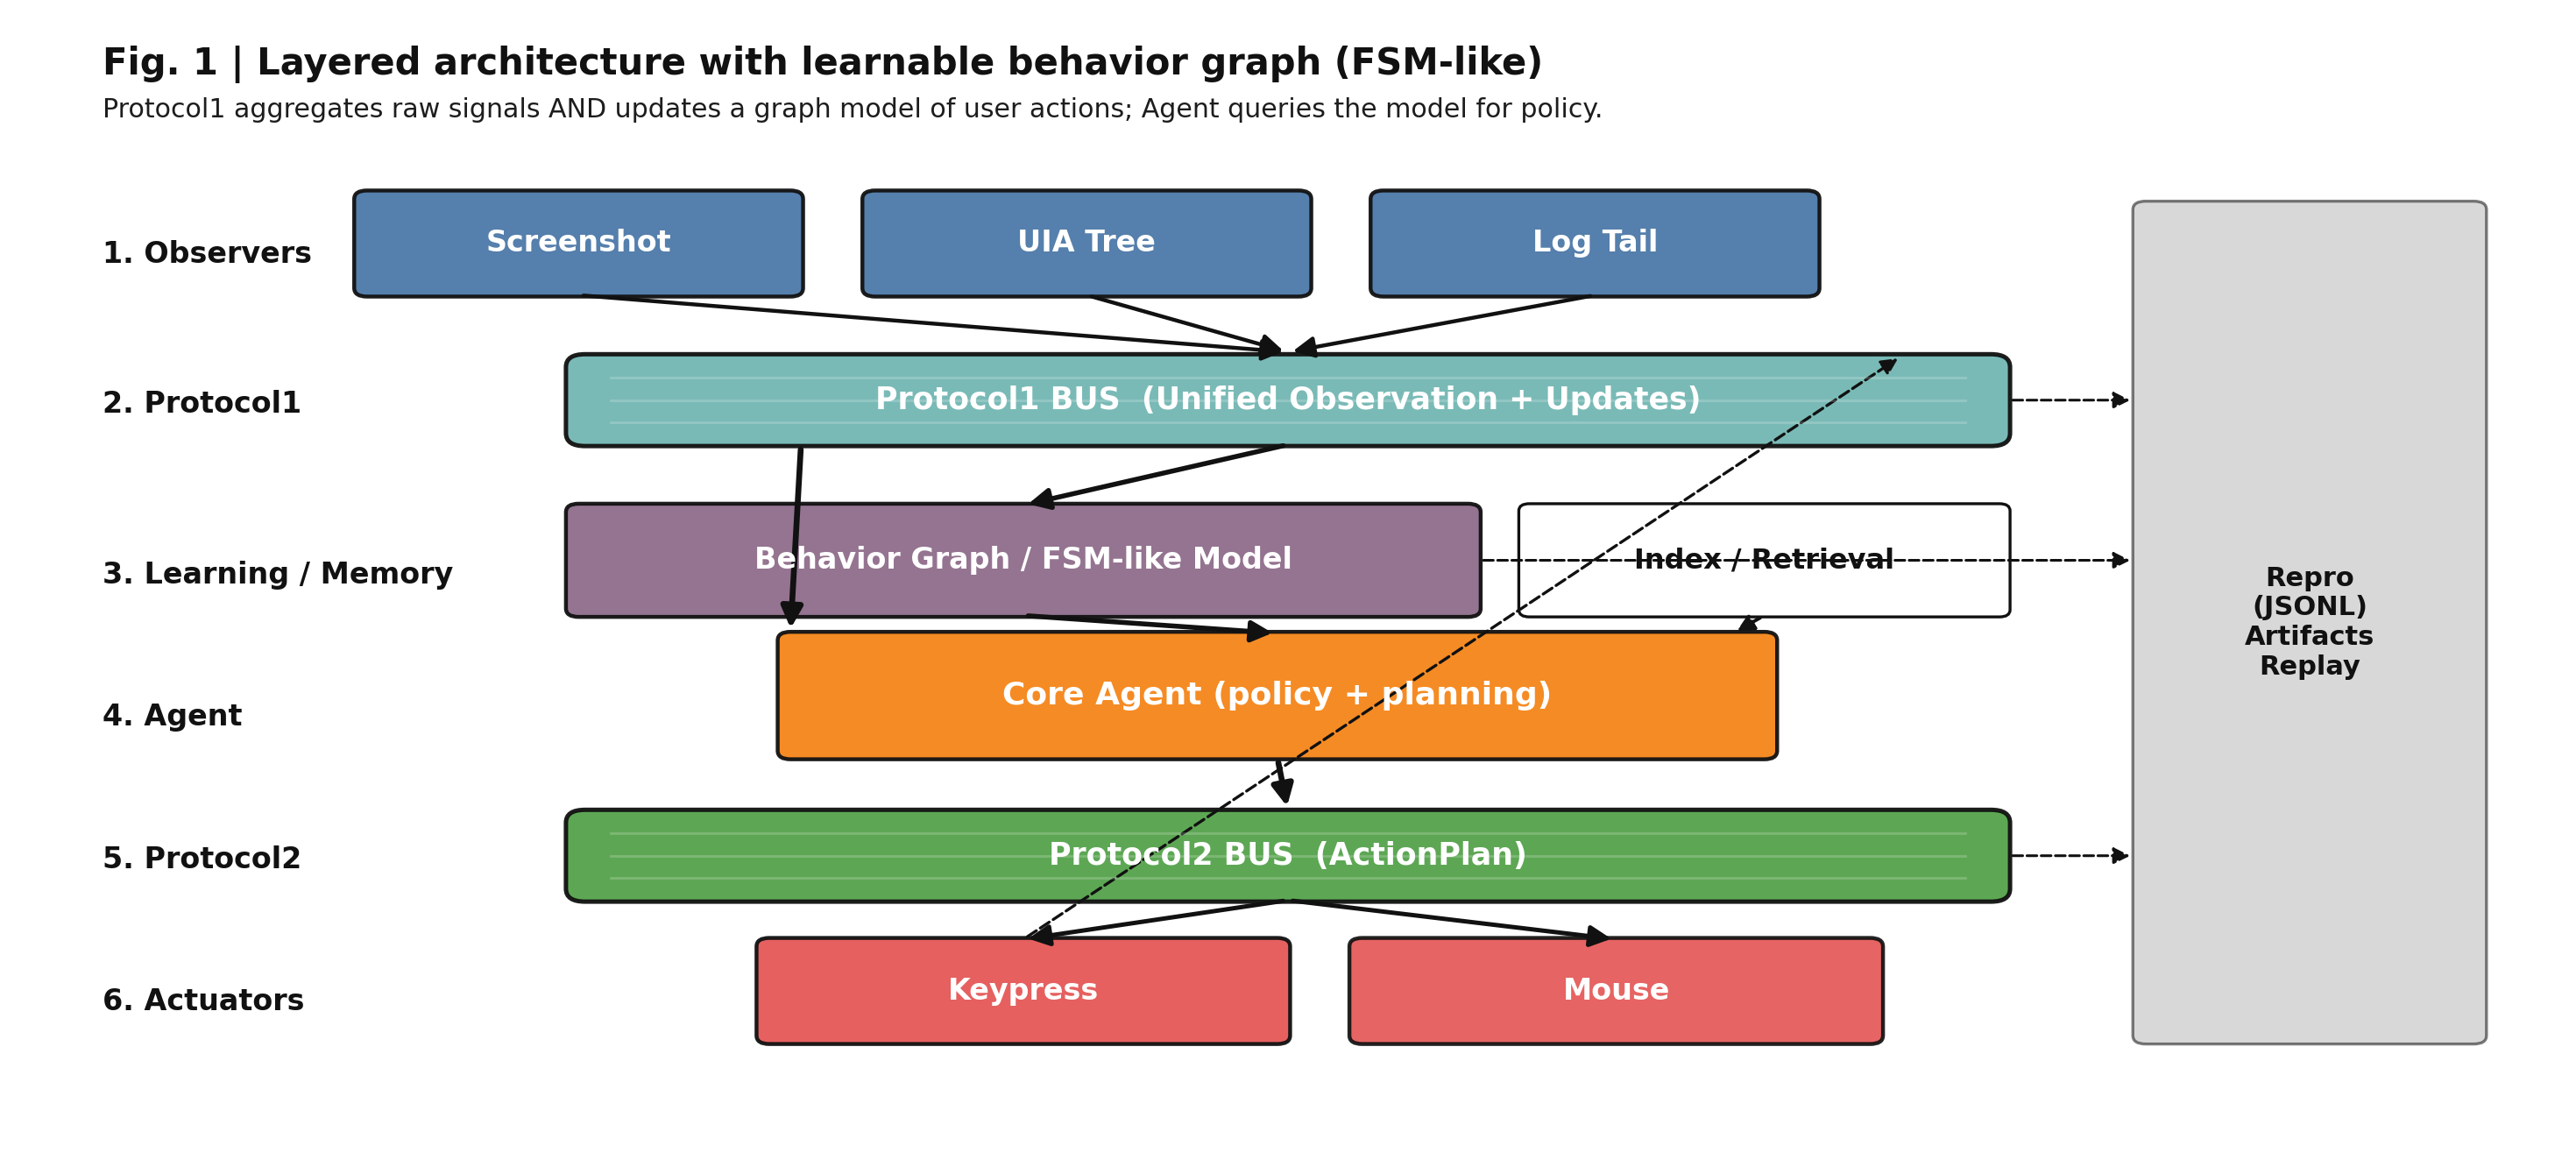

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

PAL = {
    "ink": "#111111",
    "obs": "#4C78A8",
    "p1":  "#72B7B2",
    "agent":"#F58518",
    "p2":  "#54A24B",
    "act": "#E45756",
    "mem": "#8E6C8A",   # purple-ish for learned graph / memory
    "infra":"#B9B9B9",
}

def setup(ax, xlim=(0, 24), ylim=(0, 16)):
    ax.set_xlim(*xlim); ax.set_ylim(*ylim); ax.axis("off")

def box(ax, x, y, w, h, label, fc, tc="white", lw=1.6, r=0.12, fs=12, alpha=0.95):
    p = FancyBboxPatch((x,y), w,h, boxstyle=f"round,pad=0.02,rounding_size={r}",
                       linewidth=lw, edgecolor=PAL["ink"], facecolor=fc, alpha=alpha)
    ax.add_patch(p)
    ax.text(x+w/2, y+h/2, label, ha="center", va="center",
            fontsize=fs, fontweight="bold", color=tc)
    return (x,y,w,h)

def white(ax, x,y,w,h,label, fs=11):
    return box(ax,x,y,w,h,label,"white",tc=PAL["ink"],lw=1.2,r=0.10,fs=fs,alpha=1.0)

def bus(ax, x,y,w,h,label, fc):
    r = box(ax,x,y,w,h,label,fc,tc="white",lw=1.8,r=0.18,fs=12.5,alpha=0.95)
    for k in range(1,4):
        yy=y+h*k/4
        ax.plot([x+0.4,x+w-0.4],[yy,yy],lw=1.0,color="white",alpha=0.20)
    return r

def midT(r): x,y,w,h=r; return (x+w/2, y+h)
def midB(r): x,y,w,h=r; return (x+w/2, y)
def midL(r): x,y,w,h=r; return (x, y+h/2)
def midR(r): x,y,w,h=r; return (x+w, y+h/2)

def arrow(ax, p0, p1, lw=2.2, style="-", ms=18):
    ax.add_patch(FancyArrowPatch(p0,p1, arrowstyle="-|>", mutation_scale=ms,
                                 linewidth=lw, linestyle=style, color=PAL["ink"],
                                 connectionstyle="arc3,rad=0.0"))

fig, ax = plt.subplots(figsize=(14.8, 6.8), dpi=200)
setup(ax)

ax.text(0.8, 15.2, "Fig. 1 | Layered architecture with learnable behavior graph (FSM-like)", 
        fontsize=15, fontweight="bold", color=PAL["ink"])
ax.text(0.8, 14.6, "Protocol1 aggregates raw signals AND updates a graph model of user actions; Agent queries the model for policy.",
        fontsize=10.8, color=PAL["ink"], alpha=0.95)

# --- layer y positions (top-down) ---
Y_obs, Y_p1, Y_mem, Y_agent, Y_p2, Y_act = 12.1, 10.0, 7.6, 5.6, 3.6, 1.6
H = 1.45

# left labels
labels = [
    (Y_obs,  "1. Observers"),
    (Y_p1,   "2. Protocol1"),
    (Y_mem,  "3. Learning / Memory"),
    (Y_agent,"4. Agent"),
    (Y_p2,   "5. Protocol2"),
    (Y_act,  "6. Actuators"),
]
for y, t in labels:
    ax.text(0.8, y+0.45, t, fontsize=12, fontweight="bold", color=PAL["ink"])

# Observers (independent modules)
o1 = box(ax, 3.2,  Y_obs, 4.2, H, "Screenshot", PAL["obs"], fs=12)
o2 = box(ax, 8.0,  Y_obs, 4.2, H, "UIA Tree",  PAL["obs"], fs=12)
o3 = box(ax, 12.8, Y_obs, 4.2, H, "Log Tail",  PAL["obs"], fs=12)

# Protocol1 bus (aggregation + parse)
p1 = bus(ax, 5.2, Y_p1, 13.6, 1.25, "Protocol1 BUS  (Unified Observation + Updates)", PAL["p1"])

# Learning / Memory (Graph / FSM-like model)
graph = box(ax, 5.2, Y_mem, 8.6, 1.55, "Behavior Graph / FSM-like Model", PAL["mem"], fs=12)
index = white(ax, 14.2, Y_mem, 4.6, 1.55, "Index / Retrieval", fs=11.5)

# Agent
agent = box(ax, 7.2, Y_agent, 9.4, 1.75, "Core Agent (policy + planning)", PAL["agent"], fs=13)

# Protocol2 bus
p2 = bus(ax, 5.2, Y_p2, 13.6, 1.25, "Protocol2 BUS  (ActionPlan)", PAL["p2"])

# Actuators
a1 = box(ax, 7.0,  Y_act, 5.0, H, "Keypress", PAL["act"], fs=12)
a2 = box(ax, 12.6, Y_act, 5.0, H, "Mouse",    PAL["act"], fs=12, alpha=0.92)

# Wiring (all straight, minimal)
for ob in [o1,o2,o3]:
    arrow(ax, midB(ob), (midT(p1)[0], midT(p1)[1]+0.05), lw=1.6)

# P1 -> Graph (write/update)
arrow(ax, midB(p1), midT(graph), lw=2.0)

# Graph/Index -> Agent (query)
arrow(ax, midB(graph), midT(agent), lw=2.0)
arrow(ax, midB(index), (midT(agent)[0]+4.3, midT(agent)[1]), lw=1.4, style="--", ms=14)

# P1 -> Agent (current observation)
arrow(ax, (midB(p1)[0]-4.6, midB(p1)[1]), (midT(agent)[0]-4.6, midT(agent)[1]), lw=2.4)

# Agent -> P2
arrow(ax, midB(agent), midT(p2), lw=2.4)

# P2 -> Actuators
arrow(ax, midB(p2), (midT(a1)[0], midT(a1)[1]), lw=1.8)
arrow(ax, midB(p2), (midT(a2)[0], midT(a2)[1]), lw=1.8)

# Receipt feedback (straight dashed) back to P1
arrow(ax, midT(a1), (midT(p1)[0]+5.8, midT(p1)[1]), lw=1.2, style="--", ms=14)

# Repro strip (right, no crossings)
repro = box(ax, 20.0, 1.6, 3.3, 11.8, "Repro\n(JSONL)\nArtifacts\nReplay", PAL["infra"],
            tc=PAL["ink"], fs=11, lw=1.2, alpha=0.55)
arrow(ax, (midR(p1)[0], midR(p1)[1]), (midL(repro)[0], midR(p1)[1]), lw=1.1, style="--", ms=14)
arrow(ax, (midR(p2)[0], midR(p2)[1]), (midL(repro)[0], midR(p2)[1]), lw=1.1, style="--", ms=14)
arrow(ax, (midR(graph)[0], midR(graph)[1]), (midL(repro)[0], midR(graph)[1]), lw=1.1, style="--", ms=14)

plt.tight_layout()
plt.show()


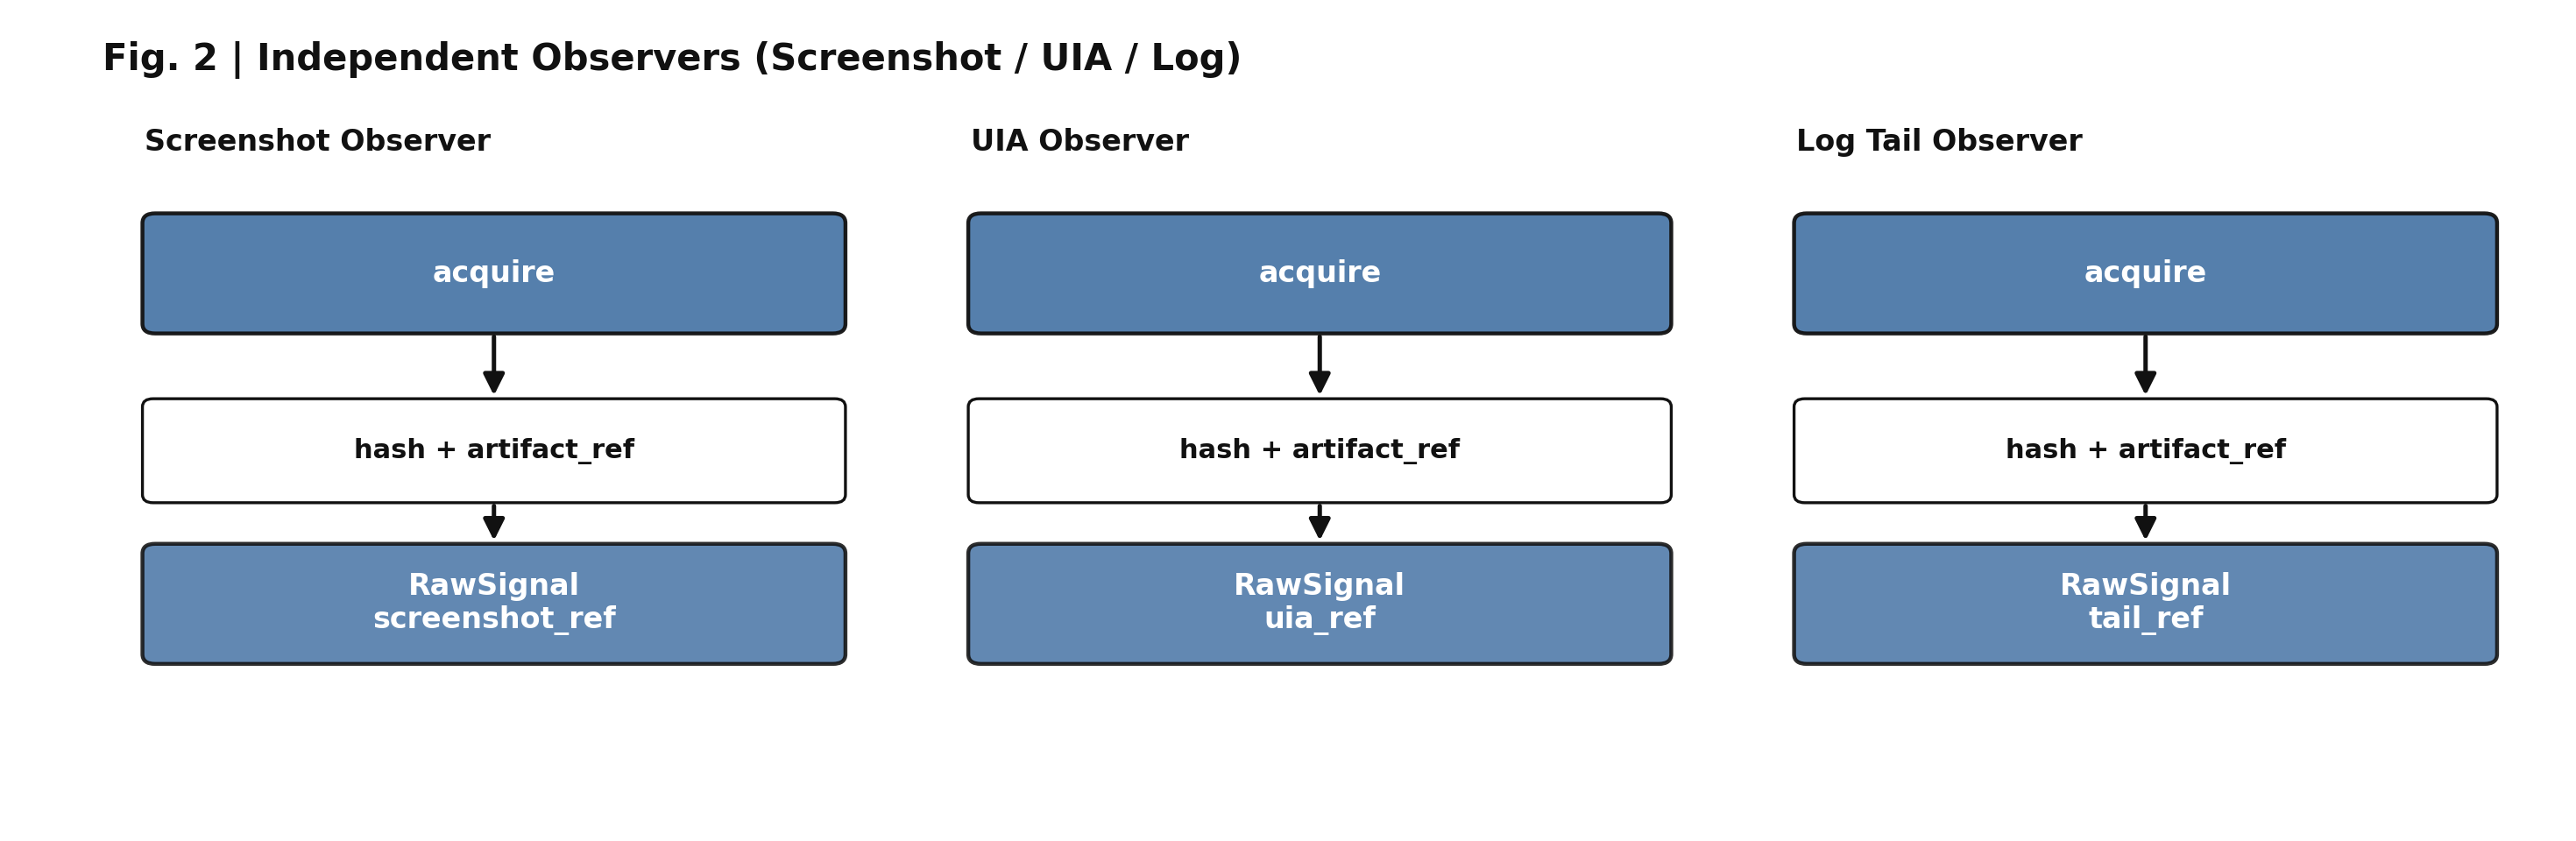

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

PAL = {"ink":"#111111","obs":"#4C78A8"}

def setup(ax, xlim=(0, 24), ylim=(0, 10)):
    ax.set_xlim(*xlim); ax.set_ylim(*ylim); ax.axis("off")

def box(ax,x,y,w,h,label,fc,tc="white",lw=1.6,r=0.12,fs=12,alpha=0.95):
    p=FancyBboxPatch((x,y),w,h,boxstyle=f"round,pad=0.02,rounding_size={r}",
                     linewidth=lw,edgecolor=PAL["ink"],facecolor=fc,alpha=alpha)
    ax.add_patch(p)
    ax.text(x+w/2,y+h/2,label,ha="center",va="center",fontsize=fs,fontweight="bold",color=tc)
    return (x,y,w,h)

def white(ax,x,y,w,h,label,fs=11):
    return box(ax,x,y,w,h,label,"white",tc=PAL["ink"],lw=1.2,r=0.10,fs=fs,alpha=1.0)

def midT(r): x,y,w,h=r; return (x+w/2,y+h)
def midB(r): x,y,w,h=r; return (x+w/2,y)

def arrow(ax,p0,p1,lw=2.0,style="-",ms=18):
    ax.add_patch(FancyArrowPatch(p0,p1,arrowstyle="-|>",mutation_scale=ms,
                                 linewidth=lw,linestyle=style,color=PAL["ink"],
                                 connectionstyle="arc3,rad=0.0"))

fig, ax = plt.subplots(figsize=(14.8, 4.9), dpi=200)
setup(ax)

ax.text(0.8, 9.35, "Fig. 2 | Independent Observers (Screenshot / UIA / Log)", fontsize=15, fontweight="bold", color=PAL["ink"])

def panel(x0, title, raw_name):
    ax.text(x0, 8.35, title, fontsize=12, fontweight="bold", color=PAL["ink"])
    s1 = box(ax, x0, 6.1, 6.6, 1.45, "acquire", PAL["obs"], fs=12)
    s2 = white(ax, x0, 4.0, 6.6, 1.25, "hash + artifact_ref", fs=11)
    s3 = box(ax, x0, 2.0, 6.6, 1.45, f"RawSignal\n{raw_name}", PAL["obs"], fs=12, alpha=0.88)
    arrow(ax, midB(s1), midT(s2), lw=1.8)
    arrow(ax, midB(s2), midT(s3), lw=1.8)

panel(1.2,  "Screenshot Observer", "screenshot_ref")
panel(9.0,  "UIA Observer",        "uia_ref")
panel(16.8, "Log Tail Observer",   "tail_ref")

plt.tight_layout()
plt.show()


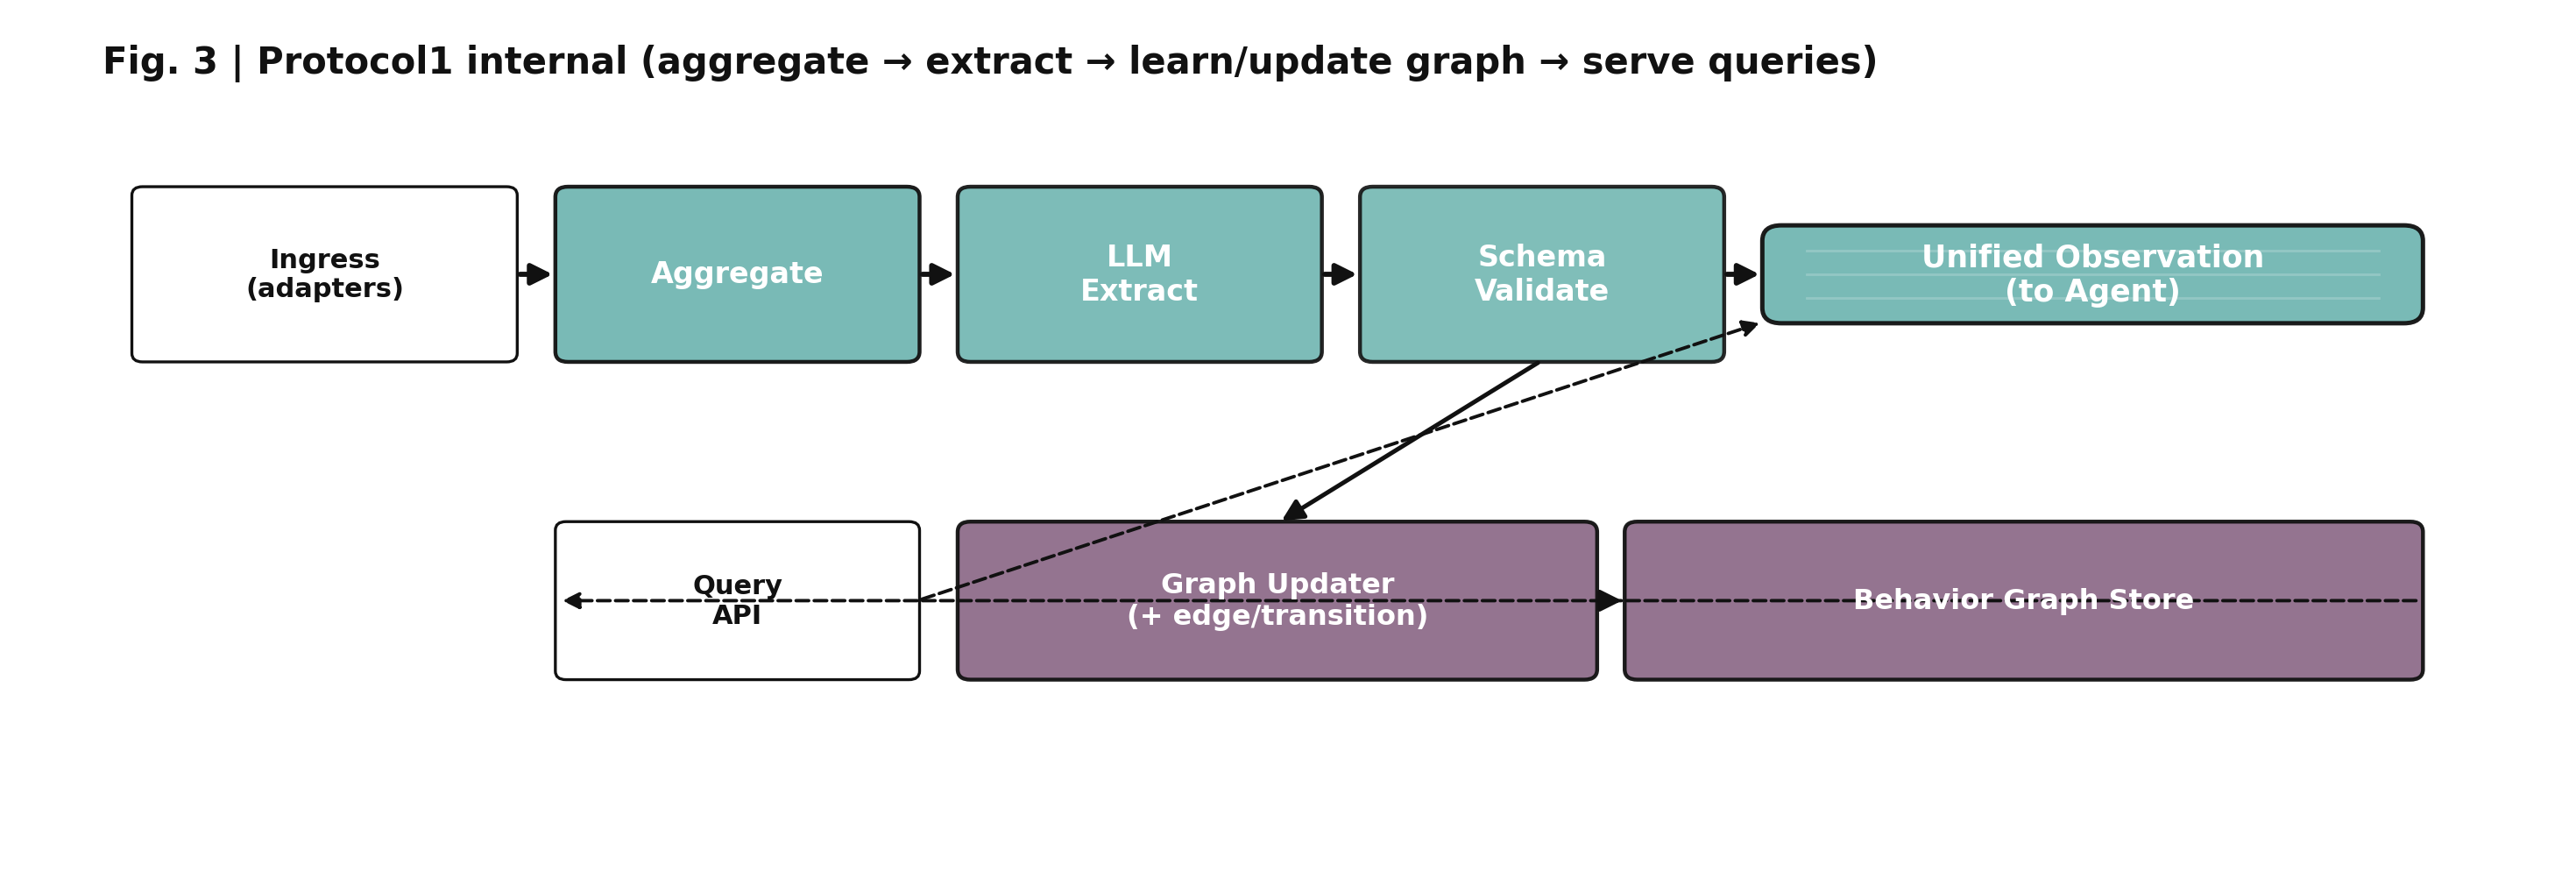

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

PAL={"ink":"#111111","p1":"#72B7B2","mem":"#8E6C8A"}

def setup(ax, xlim=(0, 24), ylim=(0, 10)):
    ax.set_xlim(*xlim); ax.set_ylim(*ylim); ax.axis("off")

def box(ax,x,y,w,h,label,fc,tc="white",lw=1.6,r=0.12,fs=12,alpha=0.95):
    p=FancyBboxPatch((x,y),w,h,boxstyle=f"round,pad=0.02,rounding_size={r}",
                     linewidth=lw,edgecolor=PAL["ink"],facecolor=fc,alpha=alpha)
    ax.add_patch(p)
    ax.text(x+w/2,y+h/2,label,ha="center",va="center",fontsize=fs,fontweight="bold",color=tc)
    return (x,y,w,h)

def white(ax,x,y,w,h,label,fs=11):
    return box(ax,x,y,w,h,label,"white",tc=PAL["ink"],lw=1.2,r=0.10,fs=fs,alpha=1.0)

def bus(ax,x,y,w,h,label):
    r=box(ax,x,y,w,h,label,PAL["p1"],fs=12.5,lw=1.8,r=0.18)
    for k in range(1,4):
        yy=y+h*k/4
        ax.plot([x+0.4,x+w-0.4],[yy,yy],lw=1.0,color="white",alpha=0.20)
    return r

def midL(r): x,y,w,h=r; return (x,y+h/2)
def midR(r): x,y,w,h=r; return (x+w,y+h/2)
def midT(r): x,y,w,h=r; return (x+w/2,y+h)
def midB(r): x,y,w,h=r; return (x+w/2,y)

def arrow(ax,p0,p1,lw=2.1,style="-",ms=18):
    ax.add_patch(FancyArrowPatch(p0,p1,arrowstyle="-|>",mutation_scale=ms,
                                 linewidth=lw,linestyle=style,color=PAL["ink"],
                                 connectionstyle="arc3,rad=0.0"))

fig, ax = plt.subplots(figsize=(14.8, 5.2), dpi=200)
setup(ax)

ax.text(0.8, 9.35, "Fig. 3 | Protocol1 internal (aggregate → extract → learn/update graph → serve queries)", 
        fontsize=15, fontweight="bold", color=PAL["ink"])

# Top pipeline (left->right, straight)
ing   = white(ax, 1.1, 6.0, 3.6, 2.0, "Ingress\n(adapters)", fs=11)
agg   = box(ax,   5.1, 6.0, 3.4, 2.0, "Aggregate", PAL["p1"])
llm   = box(ax,   8.9, 6.0, 3.4, 2.0, "LLM\nExtract", PAL["p1"], alpha=0.92)
val   = box(ax,  12.7, 6.0, 3.4, 2.0, "Schema\nValidate", PAL["p1"], alpha=0.90)
emit  = bus(ax,  16.5, 6.45, 6.2, 1.1, "Unified Observation\n(to Agent)")

arrow(ax, midR(ing),  midL(agg))
arrow(ax, midR(agg),  midL(llm))
arrow(ax, midR(llm),  midL(val))
arrow(ax, midR(val),  midL(emit))

# Learning lane (straight down from extract/validate)
graph = box(ax, 8.9, 2.3, 6.0, 1.8, "Graph Updater\n(+ edge/transition)", PAL["mem"], fs=11.5)
store = box(ax, 15.2, 2.3, 7.5, 1.8, "Behavior Graph Store", PAL["mem"], fs=11.5)

# write: from validate to updater, updater to store
arrow(ax, midB(val), midT(graph), lw=1.8)
arrow(ax, midR(graph), midL(store), lw=1.8)

# query service (optional but important): store -> emit (dashed), meaning P1 can serve features to agent
qsvc = white(ax, 5.1, 2.3, 3.4, 1.8, "Query\nAPI", fs=11)
arrow(ax, midR(store), midL(qsvc), lw=1.4, style="--", ms=14)
arrow(ax, midR(qsvc), (midL(emit)[0], midL(emit)[1]-0.55), lw=1.4, style="--", ms=14)

plt.tight_layout()
plt.show()


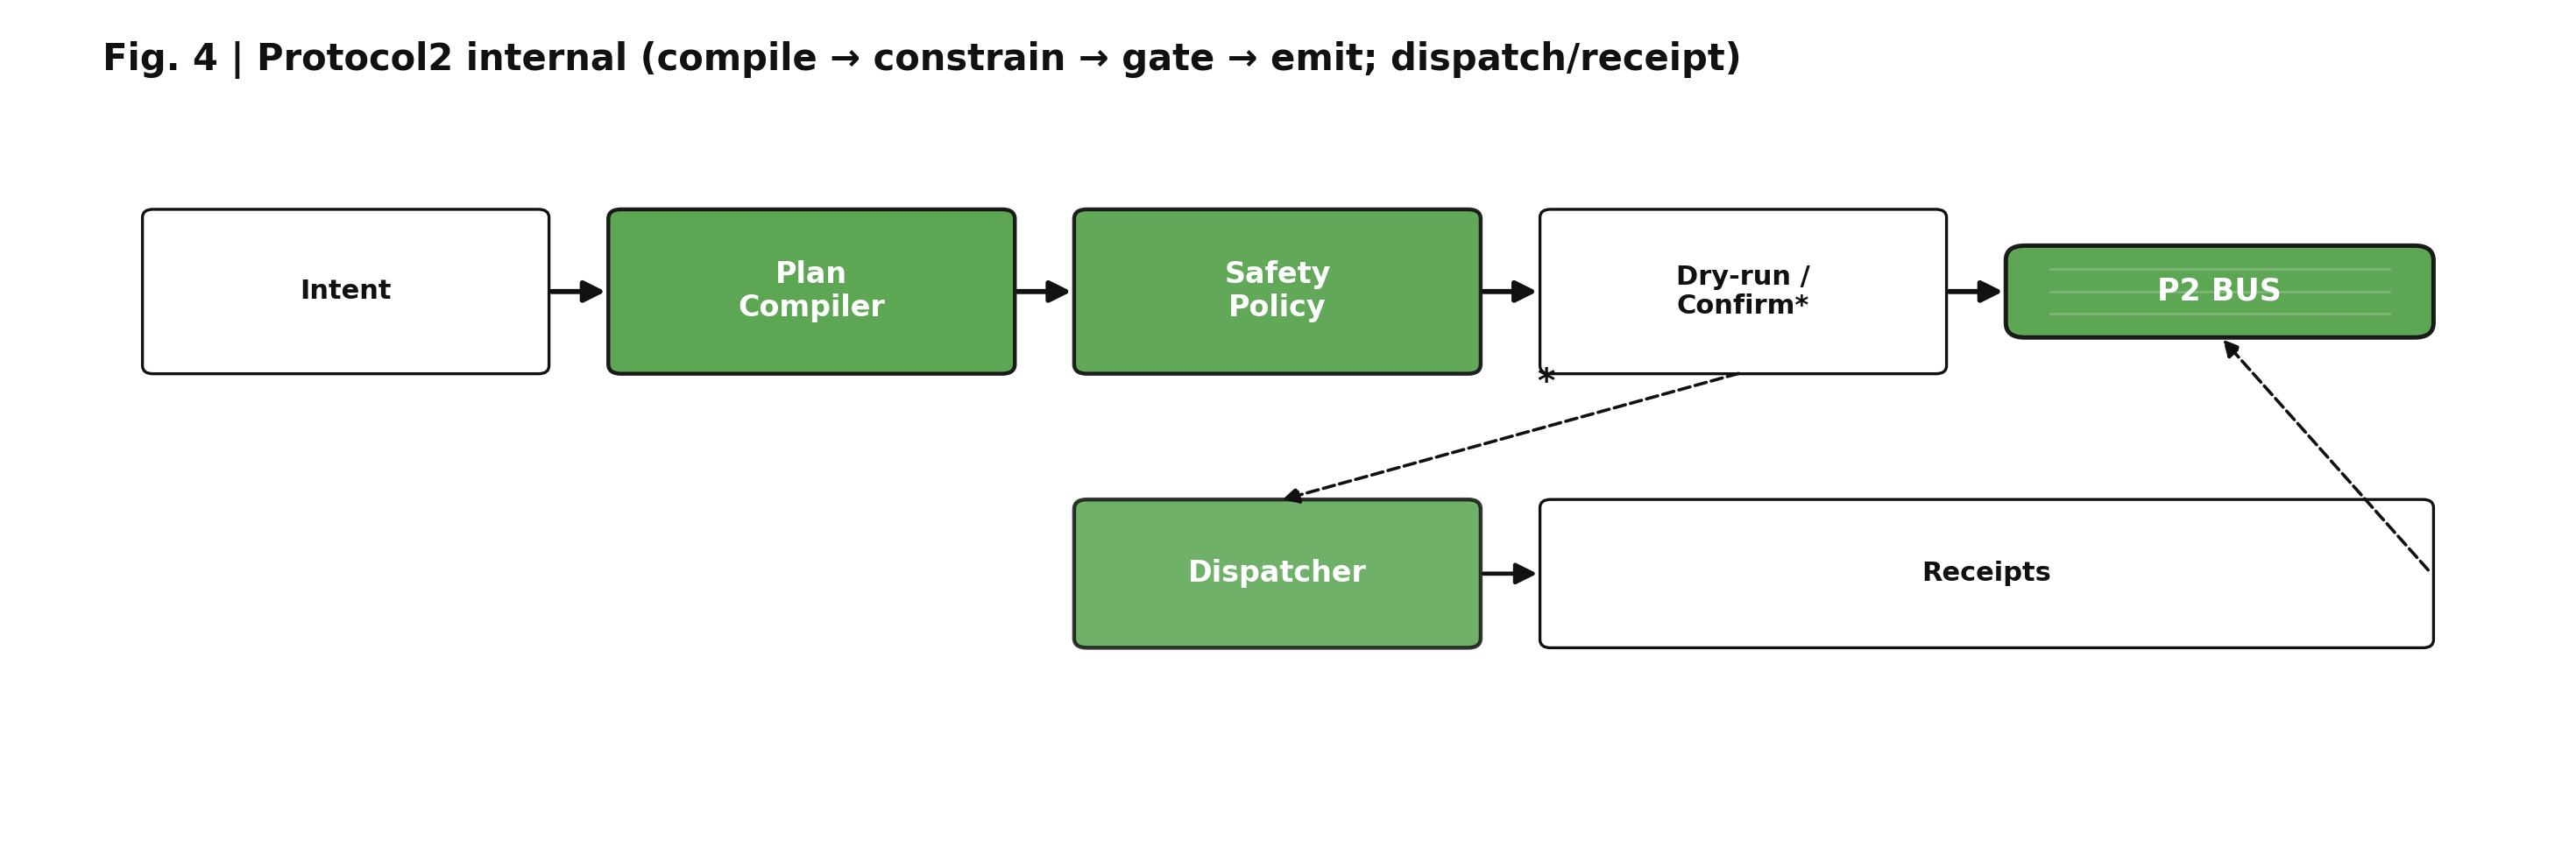

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

PAL={"ink":"#111111","p2":"#54A24B"}

def setup(ax, xlim=(0, 24), ylim=(0, 10)):
    ax.set_xlim(*xlim); ax.set_ylim(*ylim); ax.axis("off")

def box(ax,x,y,w,h,label,fc,tc="white",lw=1.6,r=0.12,fs=12,alpha=0.95):
    p=FancyBboxPatch((x,y),w,h,boxstyle=f"round,pad=0.02,rounding_size={r}",
                     linewidth=lw,edgecolor=PAL["ink"],facecolor=fc,alpha=alpha)
    ax.add_patch(p)
    ax.text(x+w/2,y+h/2,label,ha="center",va="center",fontsize=fs,fontweight="bold",color=tc)
    return (x,y,w,h)

def white(ax,x,y,w,h,label,fs=11):
    return box(ax,x,y,w,h,label,"white",tc=PAL["ink"],lw=1.2,r=0.10,fs=fs,alpha=1.0)

def bus(ax,x,y,w,h,label):
    r=box(ax,x,y,w,h,label,PAL["p2"],fs=12.5,lw=1.8,r=0.18)
    for k in range(1,4):
        yy=y+h*k/4
        ax.plot([x+0.4,x+w-0.4],[yy,yy],lw=1.0,color="white",alpha=0.20)
    return r

def midL(r): x,y,w,h=r; return (x,y+h/2)
def midR(r): x,y,w,h=r; return (x+w,y+h/2)
def midB(r): x,y,w,h=r; return (x+w/2,y)

def arrow(ax,p0,p1,lw=2.1,style="-",ms=18):
    ax.add_patch(FancyArrowPatch(p0,p1,arrowstyle="-|>",mutation_scale=ms,
                                 linewidth=lw,linestyle=style,color=PAL["ink"],
                                 connectionstyle="arc3,rad=0.0"))

fig, ax = plt.subplots(figsize=(14.8, 4.9), dpi=200)
setup(ax)

ax.text(0.8, 9.35, "Fig. 4 | Protocol2 internal (compile → constrain → gate → emit; dispatch/receipt)", 
        fontsize=15, fontweight="bold", color=PAL["ink"])

inp  = white(ax, 1.2, 5.6, 3.8, 2.0, "Intent", fs=11)
comp = box(ax,   5.6, 5.6, 3.8, 2.0, "Plan\nCompiler", PAL["p2"])
safe = box(ax,  10.0, 5.6, 3.8, 2.0, "Safety\nPolicy", PAL["p2"], alpha=0.92)
gate = white(ax,14.4, 5.6, 3.8, 2.0, "Dry-run /\nConfirm*", fs=11)
out  = bus(ax,  18.8, 6.05, 4.0, 1.1, "P2 BUS")

arrow(ax, midR(inp),  midL(comp))
arrow(ax, midR(comp), midL(safe))
arrow(ax, midR(safe), midL(gate))
arrow(ax, midR(gate), midL(out))

disp = box(ax, 10.0, 2.2, 3.8, 1.8, "Dispatcher", PAL["p2"], alpha=0.84)
recv = white(ax,14.4, 2.2, 8.4, 1.8, "Receipts", fs=11)

arrow(ax, midB(gate), (midL(disp)[0]+1.9, midL(disp)[1]+0.9), lw=1.3, style="--", ms=14)
arrow(ax, midR(disp), midL(recv), lw=1.7)
arrow(ax, (midR(recv)[0], midR(recv)[1]), (midL(out)[0]+2.0, midL(out)[1]-0.55), lw=1.3, style="--", ms=14)

ax.text(14.35, 5.35, "*", fontsize=14, fontweight="bold", color=PAL["ink"])
plt.tight_layout()
plt.show()
